In [233]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error

In [234]:
df_Salary = pd.read_csv('Salary_Data.csv')

In [235]:
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [236]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [237]:
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

# Data Info

In [238]:
df_Salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [239]:
df_Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [240]:
check_null(df_Salary)

                     Total   Percent
Age                      2  0.000298
Gender                   2  0.000298
Job Title                2  0.000298
Education Level          3  0.000447
Years of Experience      3  0.000447
Salary                   5  0.000746


In [241]:
df_cleaned = df_Salary.dropna()

In [242]:
check_null(df_cleaned)

Tidak ditemukan missing value pada dataset


In [243]:
print("Jumlah data duplikat : " + str(df_cleaned.duplicated().sum()))

Jumlah data duplikat : 4911


In [244]:
len(df_cleaned)

6698

In [245]:
df_Salary = df_cleaned

# Cek Distribusi Data

<Axes: >

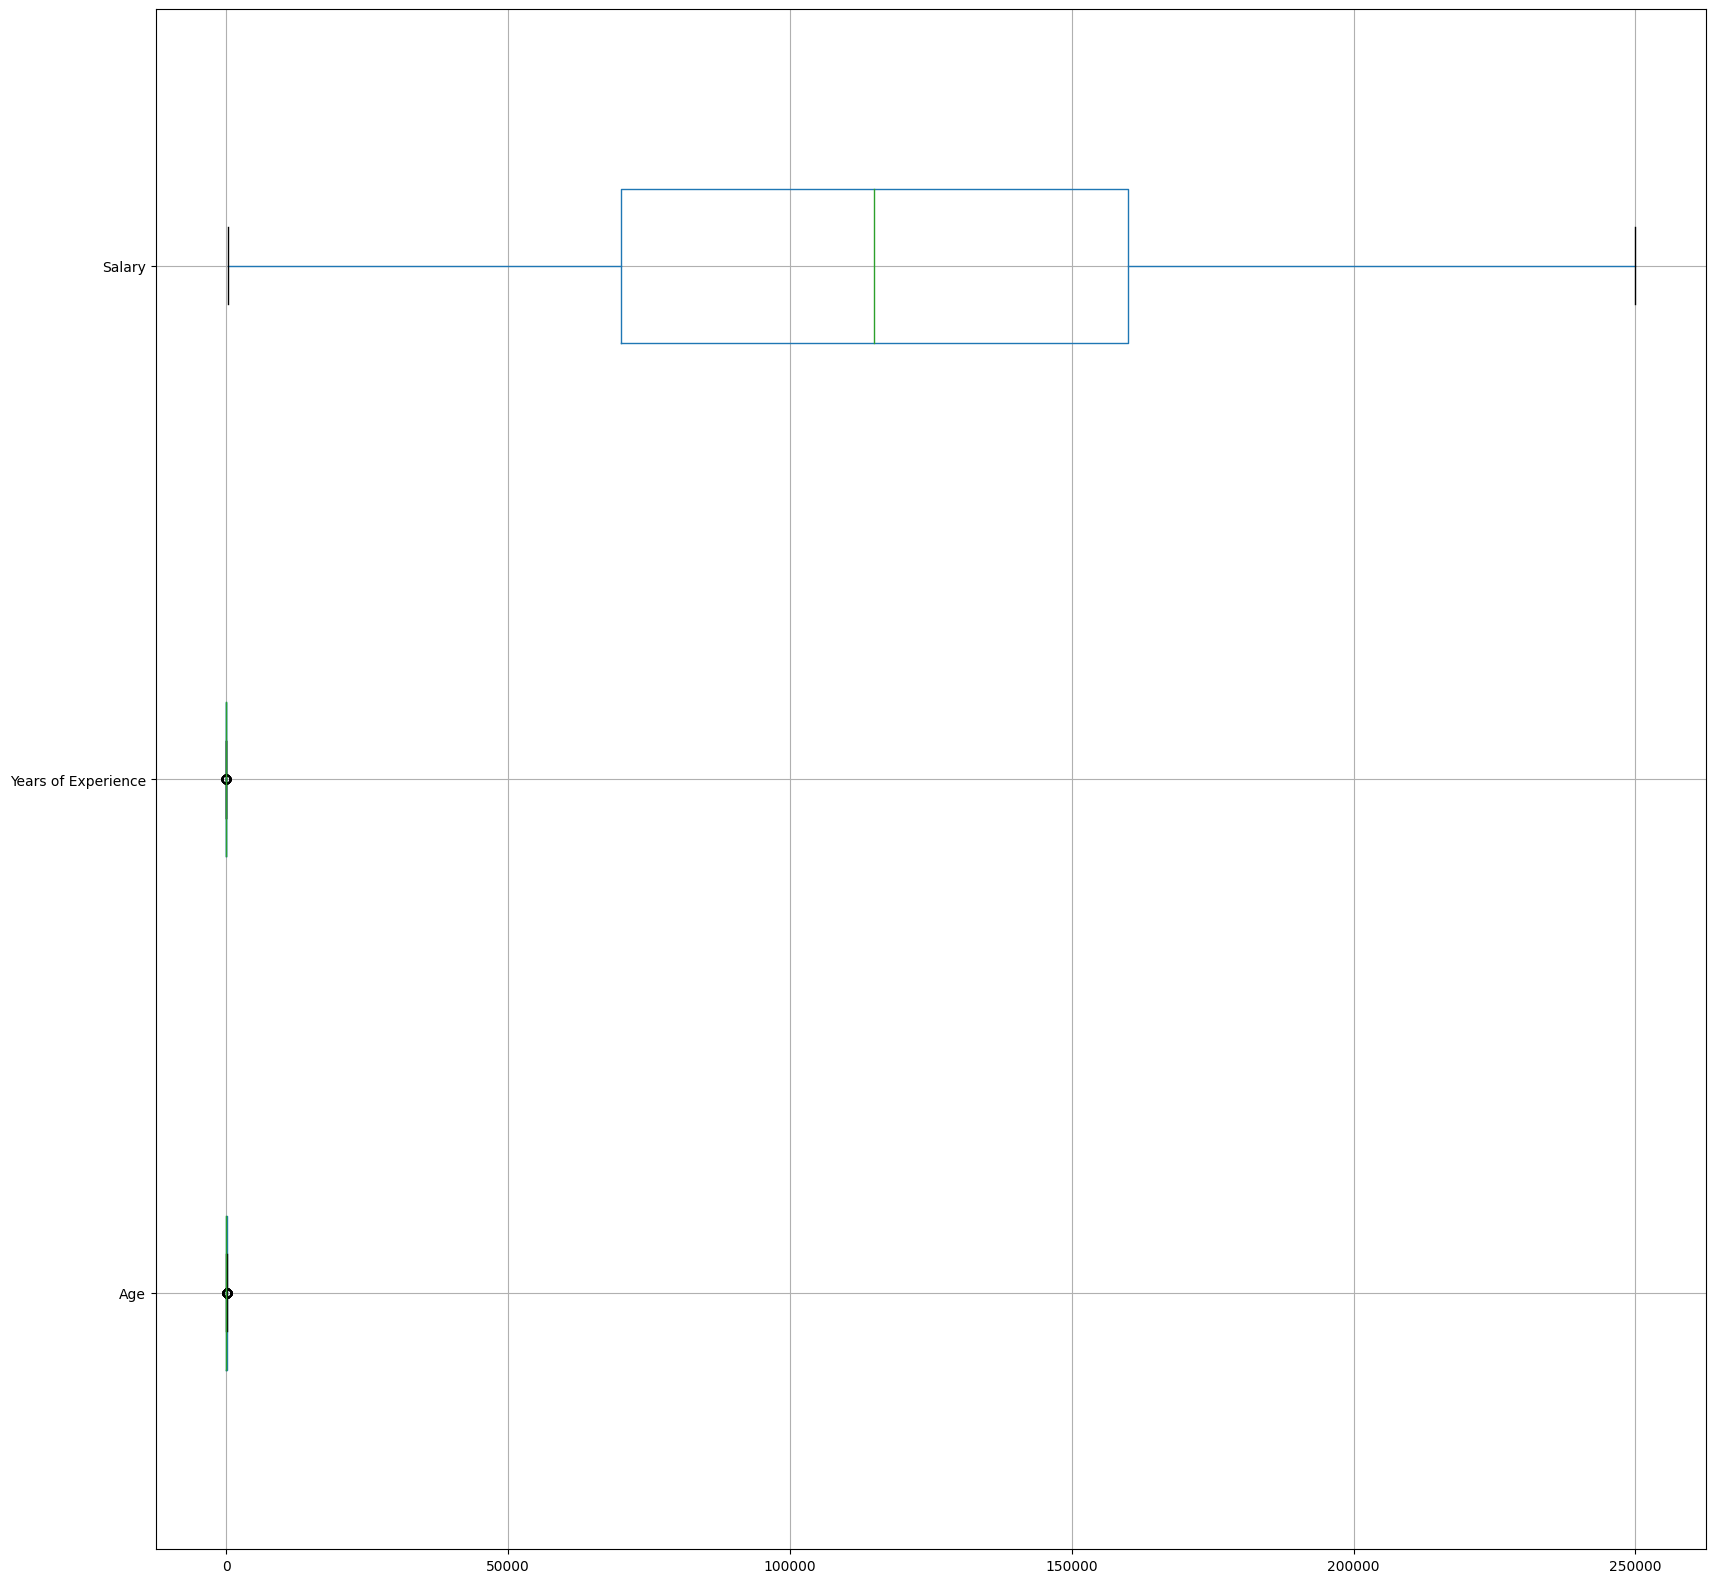

In [246]:
df_Salary.boxplot(vert=False,figsize=(20,20))

In [247]:
discrete_cols = ['Gender', 'Job Title', 'Education Level']
continous_cols = [x for x in df_Salary.columns if x not in discrete_cols]

In [248]:
continous_cols

['Age', 'Years of Experience', 'Salary']

In [249]:
discrete_cols

['Gender', 'Job Title', 'Education Level']

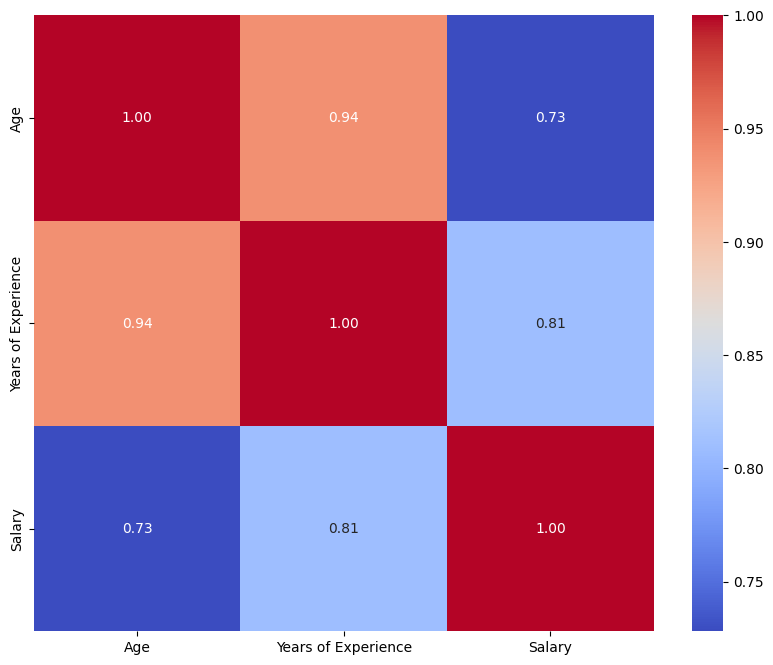

In [250]:
# Calculate the correlation matrix
correlation_matrix = df_Salary[continous_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

# Feature Updating

In [251]:
df_Salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [252]:
df_Salary['Age'].unique()

array([32., 28., 45., 36., 52., 29., 42., 31., 26., 38., 48., 35., 40.,
       27., 44., 33., 39., 25., 51., 34., 47., 30., 41., 37., 24., 43.,
       50., 46., 49., 23., 53., 61., 57., 62., 55., 56., 54., 60., 58.,
       22., 21.])

In [253]:
df_Salary['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [254]:
len(df_Salary[df_Salary['Gender'] == 'Other'])

14

In [255]:
df_Salary = df_Salary.drop(df_Salary[df_Salary['Gender'] == 'Other'].index)

In [256]:
len(df_Salary[df_Salary['Gender'] == 'Other'])

0

In [257]:
df_Salary['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [258]:
df_Salary['Education Level'].replace("Bachelor's Degree", "Bachelor's", inplace=True)

In [259]:
df_Salary['Education Level'].replace("Master's Degree", "Master's", inplace=True)

In [260]:
df_Salary['Education Level'].replace("phD", "PhD", inplace=True)

In [261]:
df_Salary['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [262]:
df_Salary['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [263]:
df_Salary['Job Title Count'] = df_Salary.groupby('Job Title')['Job Title'].transform('count')

In [264]:
df_Salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job Title Count
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,518
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,363
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,70
4,52.0,Male,Master's,Director,20.0,200000.0,1
...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,88
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,70
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0,134
6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0,255


In [265]:
df_sorted = df_Salary.sort_values(by='Job Title Count', ascending=False)

In [266]:
df_sorted['Job Title Count'].unique()

array([518, 453, 376, 363, 316, 313, 304, 255, 242, 240, 239, 158, 142,
       134, 132, 125, 114, 104,  88,  87,  75,  73,  70,  69,  64,  62,
        61,  60,  58,  57,  56,  52,  51,  49,  48,  42,  41,  39,  38,
        31,  29,  25,  22,  15,  14,  11,  10,   9,   8,   7,   6,   5,
         4,   3,   2,   1])

In [267]:
df_sorted = df_sorted[df_sorted['Job Title Count'] > 100]

In [268]:
df_sorted['Job Title Count'].unique()

array([518, 453, 376, 363, 316, 313, 304, 255, 242, 240, 239, 158, 142,
       134, 132, 125, 114, 104])

In [269]:
df_sorted = df_sorted.drop(columns = 'Job Title Count')

In [270]:
df_Salary = df_sorted

In [271]:
df_Salary['Job Title'].unique()

array(['Software Engineer', 'Data Scientist', 'Software Engineer Manager',
       'Data Analyst', 'Senior Project Engineer', 'Product Manager',
       'Full Stack Engineer', 'Marketing Manager', 'Back end Developer',
       'Senior Software Engineer', 'Front end Developer',
       'Marketing Coordinator', 'Junior Sales Associate',
       'Financial Manager', 'Marketing Analyst', 'Software Developer',
       'Operations Manager', 'Human Resources Manager'], dtype=object)

# Encoding

In [272]:
discrete_cols = ['Gender', 'Job Title', 'Education Level']
continous_cols = [x for x in df_Salary.columns if x not in discrete_cols]

In [273]:
#one hot encoding
discrete_cols_hot = ['Gender','Job Title', 'Education Level']
df_copy1 = df_Salary.copy()
for x in discrete_cols_hot:
  df_copy1 = pd.get_dummies(df_copy1, columns=[x, ])

df_Salary = df_copy1

In [274]:
df_Salary

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Job Title_Back end Developer,Job Title_Data Analyst,Job Title_Data Scientist,Job Title_Financial Manager,Job Title_Front end Developer,...,Job Title_Product Manager,Job Title_Senior Project Engineer,Job Title_Senior Software Engineer,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD
0,32.0,5.0,90000.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
392,31.0,6.0,155000.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3373,25.0,2.0,60000.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3371,23.0,1.0,50000.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
842,27.0,4.0,140000.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,41.0,13.0,140000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3738,34.0,6.0,75000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3809,39.0,11.0,120000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4465,35.0,8.0,92000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Outlier

In [275]:
check_outlier(df_Salary[continous_cols])

Outlier pada tiap atribut:
Age                    39
Years of Experience    90
Salary                  0
dtype: int64


,Age,Years of Experience,Salary
0,False,False,False
392,False,False,False
3373,False,False,False
3371,False,False,False
842,False,False,False
...,...,...,...
4104,False,False,False
3738,False,False,False
3809,False,False,False
4465,False,False,False


# Split X dan Y

In [276]:
# untuk regresi
X_regresi = df_Salary.drop(["Salary"],axis=1)
y_regresi = df_Salary['Salary']

In [324]:
X_regresi

,Age,Years of Experience,Gender_Female,Gender_Male,Job Title_Back end Developer,Job Title_Data Analyst,Job Title_Data Scientist,Job Title_Financial Manager,Job Title_Front end Developer,Job Title_Full Stack Engineer,...,Job Title_Product Manager,Job Title_Senior Project Engineer,Job Title_Senior Software Engineer,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD
0,32.0,5.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
392,31.0,6.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3373,25.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3371,23.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
842,27.0,4.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,41.0,13.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3738,34.0,6.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3809,39.0,11.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4465,35.0,8.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# PCA Analysis

In [277]:
from sklearn.decomposition import PCA
# Lakukan penskalaan data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_regresi)
# Lakukan analisis PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variants = pca.explained_variance_ratio_
explained_variants

array([1.34944906e-01, 9.61901257e-02, 7.89446605e-02, 6.21792899e-02,
       4.91797627e-02, 4.25435234e-02, 4.15889390e-02, 4.13964668e-02,
       4.11887058e-02, 4.09855616e-02, 4.09595080e-02, 4.06019056e-02,
       4.02355659e-02, 3.99391256e-02, 3.96659385e-02, 3.95945759e-02,
       3.95115329e-02, 3.05657801e-02, 2.66943449e-02, 1.77113337e-02,
       1.02101157e-02, 3.40613200e-03, 1.76220024e-03, 4.55955201e-32,
       2.50091475e-32, 5.64680171e-34])

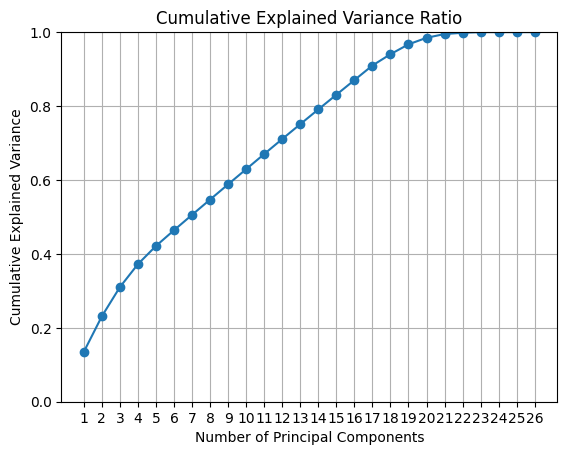

In [278]:
# Hitung cumulative explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Buat plot cumulative explained variance ratio
plt.plot(range(1, 27), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance Ratio')
plt.xticks(range(1, 27))
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Splitting Data

In [279]:
# splitting training dan test untuk regresi
X_train_regresi, X_test_regresi, y_train_regresi, y_test_regresi = train_test_split(X_regresi, y_regresi, test_size=0.2, random_state = 42)

# Standardization

In [280]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_regresi)
X_test_scaled = scaler.transform(X_test_regresi)

# KNN

In [281]:
# Mengatur jumlah pelatihan pada fold fold yang ada.
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

In [282]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

model = KNeighborsRegressor()

# Define the hyperparameter grid
tuned_params = [{'n_neighbors': [1, 2, 3, 4], 'metric': ['manhattan', 'euclidean']}]

print("Tuning hyper-parameters for KNN Regression")
print()

# Assuming you have defined 'kfold'
clfKNN = GridSearchCV(
    model,
    tuned_params,
    scoring='r2',
    cv=kfold,
    verbose=2
)

clfKNN.fit(X_train_scaled, y_train_regresi)

print()
print("Best parameters set found on development set:")
print(clfKNN.best_params_)
print()
print("Detailed regression report:")
y_true, y_pred = y_test_regresi, clfKNN.predict(X_test_scaled)

# Evaluate the model using mean squared error
regression_metrics(y_pred, y_true)

Tuning hyper-parameters for KNN Regression

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   0.1s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   0.1s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   0.1s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   0.1s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   0.1s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   0.1s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   0.1s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   0.1s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=   0.1s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=   0.1s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=   0.1s
[CV] 

In [283]:
# melakukan cross validation performa kinerja data latih
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

scores = cross_val_score(clfKNN, X_train_scaled, y_train_regresi, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   0.1s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=   0.1s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=   0.1s
[CV] END ....................metric=manhattan, n_

# Random Forest Regressor

In [284]:
# Melakukan training pada model random forest
rf_md = RandomForestRegressor()
rf_md.fit(X_train_scaled, y_train_regresi)

# Memprediksi data testing
predicted = rf_md.predict(X_test_scaled)

# Menampilkan metrics
regression_metrics(predicted, y_test_regresi)

MAE: 3373.943749314586
MSE: 71566546.48021166
RMSE: 8459.701323345385
R_squared: 0.970490344423014


In [285]:
# melakukan cross validation performa kinerja data latih
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

scores = cross_val_score(rf_md, X_train_scaled, y_train_regresi, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.9680166682964003


# Linear Regression

In [286]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train_scaled, y_train_regresi)

LinearRegression()

In [287]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model
print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [ 8.04465767e+03  2.47174939e+04  5.71216847e+15  5.71216847e+15
 -2.44111449e+15 -2.91221570e+15 -3.29156080e+15 -1.87327982e+15
 -2.44111449e+15 -2.74488485e+15 -1.63585313e+15 -1.93740002e+15
 -1.85685536e+15 -2.04409961e+15 -2.52293626e+15 -1.72804070e+15
 -2.71908625e+15 -2.77036197e+15 -2.44707355e+15 -1.72804070e+15
 -3.41030561e+15 -2.96818575e+15  1.90576272e+17  7.38923779e+16
  1.75897968e+17  1.49768505e+17]
Intersep persamaan linear: 
 124314.40293494257


In [288]:
# pengecekan dengan data baru
y_predict = linear.predict(X_test_scaled)
print("Shape of y_test:", y_test_regresi.shape)
print("Shape of y_predict:", y_predict.shape)

from sklearn import metrics
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test_regresi, y_predict))
print()
regression_metrics(y_predict, y_test_regresi)

Shape of y_test: (906,)
Shape of y_predict: (906,)
R-squared: 0.7316246873968033

MAE: 19806.137774727864
MSE: 650861350.5654359
RMSE: 25511.98444977254
R_squared: 0.7316246873968033


In [289]:
# melakukan cross validation performa kinerja data latih
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

scores = cross_val_score(linear, X_train_scaled, y_train_regresi, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.7605042502666848


# Gradient Boosting

In [290]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()

gb_regressor.fit(X_train_regresi, y_train_regresi.ravel())

predicted = gb_regressor.predict(X_test_regresi)

regression_metrics(predicted, y_test_regresi)

MAE: 11396.229501207292
MSE: 236136537.54531556
RMSE: 15366.734771750163
R_squared: 0.9026317709206345


In [291]:
# melakukan cross validation performa kinerja data latih
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

scores = cross_val_score(gb_regressor, X_train_regresi, y_train_regresi, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.9056164560221527


# NN

# Best Model Regression (Tuning Random Forest)

In [292]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['squared_error', 'friedman_mse'],
    'n_estimators': [100, 200, 300, 400, 500],
    'bootstrap': [True, False],
}

# Grid search random forest regressor
rfr = RandomForestRegressor()
clf_random_regressor = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, verbose=2)

clf_random_regressor.fit(X_train_scaled, y_train_regresi)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, criterion=squared_error, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, criterion=squared_error, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, criterion=squared_error, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, criterion=squared_error, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, criterion=squared_error, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, criterion=squared_error, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, criterion=squared_error, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, criterion=squared_error, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, criterion=squared_error, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, criterion=squared_error, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, criterion=squared_error, n_estimators=300; 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'friedman_mse'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [293]:
#CLF Random forest regressor
clf_random_regressor.best_params_

{'bootstrap': True, 'criterion': 'squared_error', 'n_estimators': 500}

In [294]:
best_random_regressor = RandomForestRegressor(**clf_random_regressor.best_params_)
best_random_regressor.fit(X_train_scaled, y_train_regresi)

RandomForestRegressor(n_estimators=500)

In [295]:
predicted_random_regressor = best_random_regressor.predict(X_test_scaled)
regression_metrics(predicted_random_regressor, y_test_regresi)

MAE: 3367.5583692821715
MSE: 71491681.94593176
RMSE: 8455.275391489728
R_squared: 0.9705212139665392


In [296]:
# melakukan cross validation performa kinerja data latih
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

scores = cross_val_score(best_random_regressor, X_train_scaled, y_train_regresi, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.9679723020999269


# Save Model

In [331]:
import pickle

In [332]:
data = {'model' : best_random_regressor}
with open('regresi_steps.pkl', 'wb') as file:
  pickle.dump(data, file)

In [333]:
with open('regresi_steps.pkl', 'rb') as file:
  data = pickle.load(file)

model_regresi = data["model"]

In [334]:
predicted_random_regressor = model_regresi.predict(X_test_scaled)
regression_metrics(predicted_random_regressor, y_test_regresi)

MAE: 3367.5583692821715
MSE: 71491681.94593176
RMSE: 8455.275391489728
R_squared: 0.9705212139665392


In [375]:
age = 32
gender = 'Male'
edu = "Bachelor's"
job = "Software Engineer"
year_experience = 5

In [376]:
user_data = {'Age': age, 'Gender': gender, 'Education Level': edu,
                     'Job Title': job, 'Years of Experience': year_experience}

In [377]:
df_user = pd.DataFrame([user_data])

In [378]:
df_encoded_user = pd.get_dummies(
            df_user, columns=['Gender', 'Job Title','Education Level', ])

In [379]:
df_encoded_user

,Age,Years of Experience,Gender_Male,Job Title_Software Engineer,Education Level_Bachelor's
0,32,5,1,1,1


In [380]:
expected_columns = df_Salary.columns

In [382]:
train_columns = set(expected_columns)
test_columns = set(df_encoded_user.columns)

train_columns_only = train_columns - test_columns
test_columns_only = test_columns - train_columns

for column in train_columns_only:
    df_encoded_user[column] = 0

co_testing = df_encoded_user[expected_columns]
testing_selected = co_testing.drop(columns=['Salary'])
testing_selected

,Age,Years of Experience,Gender_Female,Gender_Male,Job Title_Back end Developer,Job Title_Data Analyst,Job Title_Data Scientist,Job Title_Financial Manager,Job Title_Front end Developer,Job Title_Full Stack Engineer,...,Job Title_Product Manager,Job Title_Senior Project Engineer,Job Title_Senior Software Engineer,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD
0,32,5,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [383]:
X_regresi

,Age,Years of Experience,Gender_Female,Gender_Male,Job Title_Back end Developer,Job Title_Data Analyst,Job Title_Data Scientist,Job Title_Financial Manager,Job Title_Front end Developer,Job Title_Full Stack Engineer,...,Job Title_Product Manager,Job Title_Senior Project Engineer,Job Title_Senior Software Engineer,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD
0,32.0,5.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
392,31.0,6.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3373,25.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3371,23.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
842,27.0,4.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,41.0,13.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3738,34.0,6.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3809,39.0,11.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4465,35.0,8.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [384]:
y_regresi

0        90000.0
392     155000.0
3373     60000.0
3371     50000.0
842     140000.0
          ...   
4104    140000.0
3738     75000.0
3809    120000.0
4465     92000.0
4405     92000.0
Name: Salary, Length: 4528, dtype: float64

In [385]:
testing_selected.columns

Index(['Age', 'Years of Experience', 'Gender_Female', 'Gender_Male',
       'Job Title_Back end Developer', 'Job Title_Data Analyst',
       'Job Title_Data Scientist', 'Job Title_Financial Manager',
       'Job Title_Front end Developer', 'Job Title_Full Stack Engineer',
       'Job Title_Human Resources Manager', 'Job Title_Junior Sales Associate',
       'Job Title_Marketing Analyst', 'Job Title_Marketing Coordinator',
       'Job Title_Marketing Manager', 'Job Title_Operations Manager',
       'Job Title_Product Manager', 'Job Title_Senior Project Engineer',
       'Job Title_Senior Software Engineer', 'Job Title_Software Developer',
       'Job Title_Software Engineer', 'Job Title_Software Engineer Manager',
       'Education Level_Bachelor's', 'Education Level_High School',
       'Education Level_Master's', 'Education Level_PhD'],
      dtype='object')

In [386]:
X = testing_selected.values.astype(float)

In [387]:
pred_salary = model_regresi.predict(X)

In [388]:
pred_salary

array([186779.1135])

# Identifikasi buat Web

In [304]:
!pip install --upgrade scikit-learn

In [305]:
import sklearn
import joblib
import pickle

print(f"scikit-learn version: {sklearn.__version__}")
print(f"joblib version: {joblib.__version__}")
print(f"pickle format version: {pickle.format_version}")

scikit-learn version: 1.4.0
joblib version: 1.3.2
pickle format version: 4.0
